## Image Classification Exercise

Build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

### Data
Run the code below to download the dataset using Keras.

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

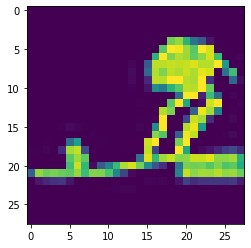

In [7]:
plt.imshow(x_train[777])

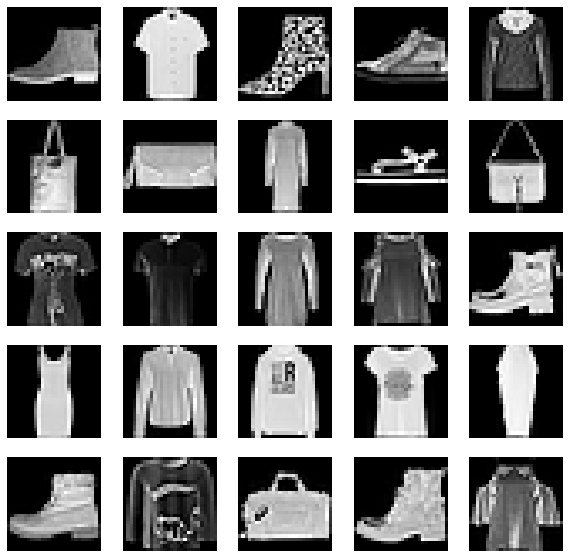

In [47]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
plt.figure(figsize=(10,10))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

**Normalize the X train and X test data.**

In [40]:
x_train = x_train/x_train[0].max()
x_test = x_test/x_train[0].max()

In [41]:
x_train[0].min(),  x_train[0].max()

(0.0, 1.0)

**Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [42]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [43]:
from tensorflow.keras.utils import to_categorical

In [48]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape, y_test_cat.shape

((60000, 10), (10000, 10))

**Use Keras to create a model consisting of at least the following layers (feel free to improve):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation


In [55]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

**Compile the model with: loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [96]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [104]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [98]:
model.fit(x=x_train, y=y_train_cat, epochs=5, validation_data=(x_test, y_test_cat), callbacks=[early_stop], verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.3865 - accuracy: 0.8635 - val_loss: 55.2612 - val_accuracy: 0.8508
Epoch 2/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.2741 - accuracy: 0.9002 - val_loss: 65.9825 - val_accuracy: 0.8216
Epoch 3/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.2317 - accuracy: 0.9140 - val_loss: 73.3217 - val_accuracy: 0.8305
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.1985 - accuracy: 0.9264 - val_loss: 50.8396 - val_accuracy: 0.8743
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.1730 - accuracy: 0.9358 - val_loss: 62.2709 - val_accuracy: 0.8600
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/sample - loss: 0.1489 - accuracy: 0.9452 - val_loss: 73.7206 - val_accuracy: 0.8444
Epoch 7/10
60000/60000 [====================

**Show the accuracy,precision,recall, f1-score the model achieved on the x_test data set.**

In [60]:
from sklearn.metrics import classification_report

In [99]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

In [100]:
predictions.shape , y_test_cat.shape

((10000,), (10000, 10))

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76      1000
           1       0.94      0.99      0.96      1000
           2       0.92      0.52      0.66      1000
           3       0.91      0.79      0.85      1000
           4       0.72      0.86      0.78      1000
           5       0.96      0.97      0.97      1000
           6       0.53      0.84      0.65      1000
           7       0.96      0.94      0.95      1000
           8       0.95      0.99      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.88      0.85      0.85     10000
weighted avg       0.88      0.85      0.85     10000

